In [13]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib
from matplotlib.lines import Line2D
import calendar as cal
import plotly.figure_factory as ff

from modules import utils as ut
from modules import data_processing as dp
from modules import data_retrieval as dr 
from modules import statistics as st
from modules import seasonal_data_grouper as sdg
from eval import *
%matplotlib inline

## AVAILABLE STATIONS

In [14]:
dict_of_names = {}
with open('modules/conv_stat_names.json') as file:
    dict_of_names = json.load(file)

dict_of_names['stations']

{'Ispra': 'IPR',
 'Montseny': 'MSY',
 'OPE': 'OPE',
 'Payerne': 'PAY',
 'Rigi': 'RIG',
 'Paris_SIRTA': 'SIR',
 'Athens_Demokritos': 'DEM',
 'Barcelona_PalauReial': 'BCN',
 'Marseille': 'MAR',
 'Krakow': 'KRA',
 'Helsinki': 'HEL',
 'Hyytiala': 'HYY'}

### MASS 

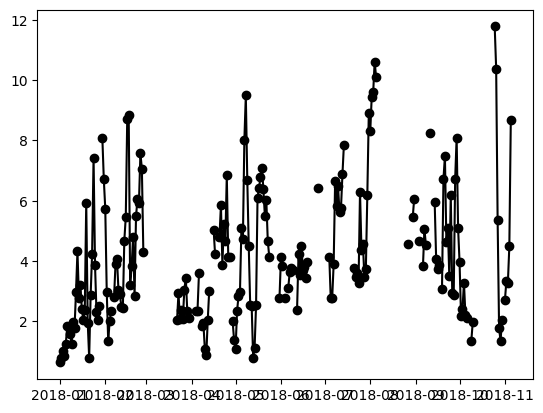

In [86]:
stn = "BCN"
data_obs = dr.get_mass_obs(ut.convention_names_stations()["acr_first"][stn], 
            remove_negatives=True)
data_mod_tot = pd.DataFrame(dr.get_mass_mod(ut.convention_names_stations()["acr_first"][stn]).sum(axis=1),
                         columns=['pm2p5oa'])
data_mod_sa = pd.DataFrame(dr.get_mass_mod(ut.convention_names_stations()["acr_first"][stn]))

plt.plot(data_obs, 
            marker="o", 
            color="black", 
            linestyle='-', 
            label=stn)
plt.rcParams.update(plt.rcParamsDefault)

plt.show()

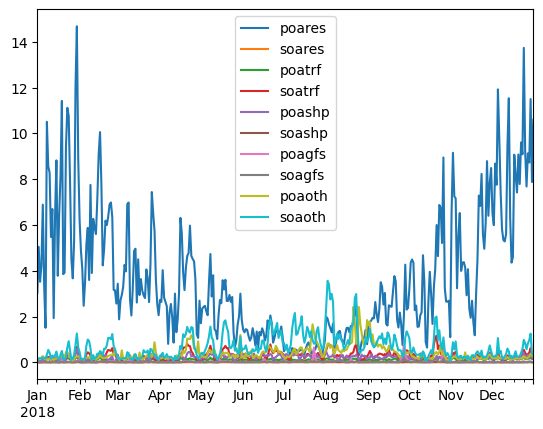

In [87]:
data_mod_sa.plot()
plt.show()

In [4]:
df = data_mod_sa.copy()
# Sumar pares de columnas y crear una nueva columna para cada suma
df['oares'] = df['poares'] + df['soares']
df['oatrf'] = df['poatrf'] + df['soatrf']
df['oashp'] = df['poashp'] + df['soashp']
df['oagfs'] = df['poagfs'] + df['soagfs']
df['oaoth'] = df['poaoth'] + df['soaoth']
# Eliminar las columnas sobrantes
columnas_a_eliminar = ['poares', 'soares', 'poatrf', 'soatrf', 'poashp', 'soashp', 'poagfs', 'soagfs', 'poaoth', 'soaoth']
df = df.drop(columns=columnas_a_eliminar)

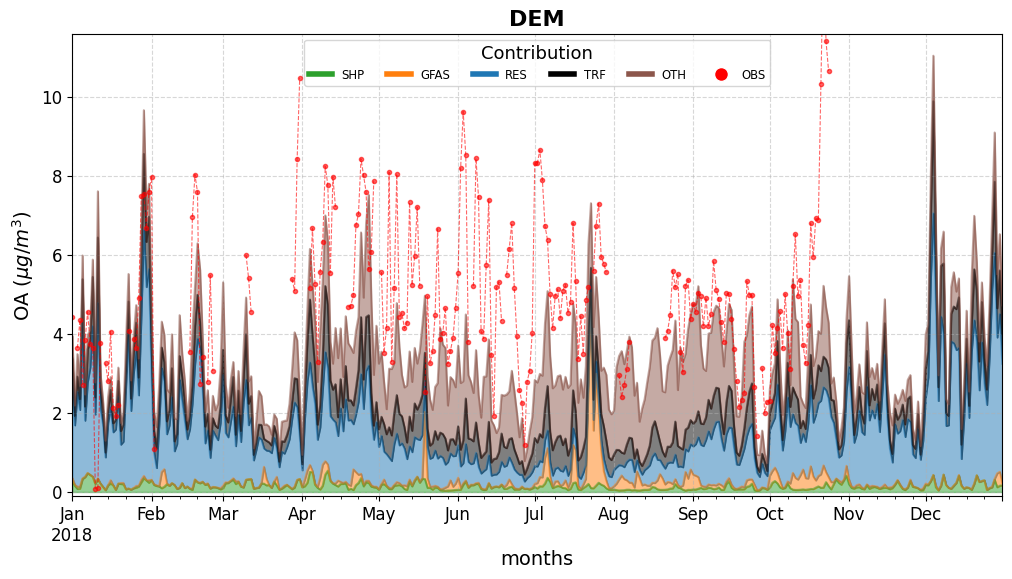

In [90]:

def plot_mass_contributions(stn):
    # Obtener datos de observaciones y modelo
    data_obs = dr.get_mass_obs(ut.convention_names_stations()["acr_first"][stn], remove_negatives=True)
    data_mod_sa = pd.DataFrame(dr.get_mass_mod(ut.convention_names_stations()["acr_first"][stn]))
    
    # Crear DataFrame para las contribuciones
    df = data_mod_sa.copy()
    df['oares'] = df['poares'] + df['soares']
    df['oatrf'] = df['poatrf'] + df['soatrf']
    df['oashp'] = df['poashp'] + df['soashp']
    df['oagfs'] = df['poagfs'] + df['soagfs']
    df['oaoth'] = df['poaoth'] + df['soaoth']
    
    # Eliminar columnas sobrantes
    columnas_a_eliminar = ['poares', 'soares', 'poatrf', 'soatrf', 'poashp', 'soashp', 'poagfs', 'soagfs', 'poaoth', 'soaoth']
    df = df.drop(columns=columnas_a_eliminar)
    
    # Ordenar las categorías
    orden_categorias = ['oashp', 'oagfs', 'oares', 'oatrf', 'oaoth']
    df = df[orden_categorias]
    
    # Definir colores y etiquetas personalizadas
    colores = {
        'oares': '#1f77b4',  # Azul claro
        'oagfs': '#ff7f0e',  # Naranja
        'oatrf': '#000000',  # Negro mate
        'oashp': '#2ca02c',
        'oaoth': '#8c564b'
    }
    
    etiquetas_personalizadas = {
        'oagfs': 'GFAS',
        'oares': 'RES',
        'oatrf': 'TRF',
        'oashp': 'SHP',
        'oaoth': 'OTH'
    }
    
    # Crear el gráfico de áreas
    ax = df.plot.area(stacked=True, alpha=0.5, color=[colores.get(col, 'gray') for col in df.columns], figsize=(12, 6))
    
    # Añadir puntos de observación
    color_obs = 'red'
    ax.plot(data_obs, color=color_obs, marker='o', linestyle='--', ms=3, lw=0.8, alpha=0.6)
    
    # Añadir títulos y etiquetas
    plt.title(stn, fontsize=16, fontweight='bold')
    plt.xlabel('months', fontsize=14)
    plt.ylabel(r'OA ($\mu g/m^3$)', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Añadir rejilla
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Crear una lista de etiquetas con colores personalizados
    etiquetas_con_colores = [
        (etiquetas_personalizadas.get(col, col), colores.get(col, None))
        for col in df.columns
    ]
    
    # Añadir leyenda con etiquetas personalizadas y colores
    handles = [plt.Line2D([0], [0], color=color, lw=4) for etiqueta, color in etiquetas_con_colores]
    labels = [etiqueta for etiqueta, _ in etiquetas_con_colores]
    
    # Añadir leyenda de observaciones
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_obs, markersize=10))
    labels.append('OBS')
    
    plt.legend(handles=handles, labels=labels, loc='upper center', fontsize='small', title='Contribution', title_fontsize='13', ncol=6)
    
    # Ajustar el espacio en el eje Y
    plt.ylim(bottom=-0.1)
    
    # Mostrar el gráfico
    plt.show()

# Llama a la función con el nombre de la estación
plot_mass_contributions('DEM')

In [6]:
#ut.plot_line_mass('RIG')

## Donut mass contribution

0.2917920076288283
5.89950866997242
258.73425006866455
30.481663942337036
64.59275364875793


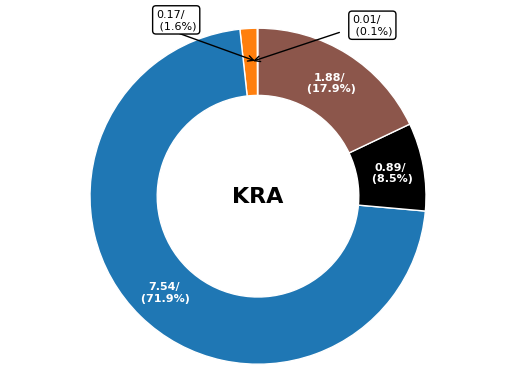

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_donut_contributions(stn):
    # Obtener los datos para la estación deseada
    data_mod_sa = pd.DataFrame(dr.get_mass_mod(ut.convention_names_stations()["acr_first"][stn]))
    
    # Crear DataFrame para las contribuciones
    df = data_mod_sa.copy()
    df['oares'] = df['poares'] + df['soares']
    df['oatrf'] = df['poatrf'] + df['soatrf']
    df['oashp'] = df['poashp'] + df['soashp']
    df['oagfs'] = df['poagfs'] + df['soagfs']
    df['oaoth'] = df['poaoth'] + df['soaoth']
    
    # Eliminar columnas sobrantes
    columnas_a_eliminar = ['poares', 'soares', 'poatrf', 'soatrf', 'poashp', 'soashp', 'poagfs', 'soagfs', 'poaoth', 'soaoth']
    df = df.drop(columns=columnas_a_eliminar)
    
    # Ordenar las categorías
    orden_categorias = ['oashp', 'oagfs', 'oares', 'oatrf', 'oaoth']
    df = df[orden_categorias]
    
    # Calcular la contribución media anual
    contribucion_media_anual = df.mean()
    
    # Obtener nombres de categorías y valores
    categorias = contribucion_media_anual.index
    valores = contribucion_media_anual.values
    
    # Define una paleta de colores para las categorías
    colores = {
        'oares': '#1f77b4',  # Azul claro
        'oagfs': '#ff7f0e',  # Naranja
        'oatrf': '#000000',  # Negro mate
        'oashp': '#2ca02c',
        'oaoth': '#8c564b'
    }
    
    # Obtener colores correspondientes a las categorías
    colores_categorias = [colores.get(cat, 'gray') for cat in categorias]
    
    # Etiquetas personalizadas para las categorías
    etiquetas_personalizadas = {
        'oagfs': 'GFAS',
        'oares': 'RES',
        'oatrf': 'TRF',
        'oashp': 'SHP',
        'oaoth': 'OTH'
    }
    
    # Obtener etiquetas personalizadas correspondientes a las categorías
    etiquetas_categorias = [etiquetas_personalizadas.get(cat, cat) for cat in categorias]
    
    # Crear un gráfico de donut
    fig, ax = plt.subplots()
    wedges, _ = ax.pie(valores, labels=None, autopct=None, startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'),
                       colors=colores_categorias, textprops={'fontsize': 10, 'color': 'black', 'fontweight': 'bold'})

    # Agregar el nombre de la estación en el centro
    ax.text(0, 0, stn, ha='center', va='center', fontsize=16, fontweight='bold')
    fontsize = 8
    # Añadir los valores absolutos y los porcentajes al interior del sector del donut
    for wedge, etiqueta, valor in zip(wedges, etiquetas_categorias, valores):
        angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
        x = 0.8 * np.cos(np.deg2rad(angle))
        y = 0.8 * np.sin(np.deg2rad(angle))
        #ax.text(x, y, f'{valor:.2f}/\n ({valor/sum(valores)*100:.1f}%)', 
        #        ha='center', va='center', fontsize=10, fontweight='bold', color='white')
        print(wedge.theta2 - wedge.theta1)
        if (wedge.theta2 - wedge.theta1) == 2.407016381621361:
            #this is for BCN
            ax.annotate('', xy=(x, y), xytext=(-.5, .98), arrowprops=dict(arrowstyle='->'))
            ax.annotate(f'{valor:.2f}/\n ({valor/sum(valores)*100:.1f}%)', xy=(x, y), xytext=(-68, 25),
                                textcoords='offset points', fontsize=fontsize,
                                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
                
        elif (wedge.theta2 - wedge.theta1) < 4 and (wedge.theta2 - wedge.theta1) > 3:
            #for MSY
            ax.annotate('', xy=(x, y), xytext=(-.5, .98), arrowprops=dict(arrowstyle='->'))
            ax.annotate(f'{valor:.2f}/\n ({valor/sum(valores)*100:.1f}%)', xy=(x, y), xytext=(-68, 24),
                                textcoords='offset points', fontsize=fontsize,
                                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
        elif (wedge.theta2 - wedge.theta1) > 2 and (wedge.theta2 - wedge.theta1) < 3:
            if stn in ['MSY', 'IPR', 'HYY']:
                ax.annotate('', xy=(x, y), xytext=(.5, .98), arrowprops=dict(arrowstyle='->'))
                ax.annotate(f'{valor:.2f}/\n ({valor/sum(valores)*100:.1f}%)', xy=(x, y), xytext=(60, 24),
                                    textcoords='offset points', fontsize=fontsize,
                                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
            elif stn in ['PAY']:
                ax.annotate('', xy=(x, y), xytext=(.5, .98), arrowprops=dict(arrowstyle='->'))
                ax.annotate(f'{valor:.2f}/\n ({valor/sum(valores)*100:.1f}%)', xy=(x, y), xytext=(-68, 24),
                                    textcoords='offset points', fontsize=fontsize,
                                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
            elif stn in ['SIR']:
                if (wedge.theta2 - wedge.theta1) == 2.3551327362656593:
                    ax.annotate('', xy=(x, y), xytext=(-.5, .98), arrowprops=dict(arrowstyle='->'))
                    ax.annotate(f'{valor:.2f}/\n ({valor/sum(valores)*100:.1f}%)', xy=(x, y), xytext=(-68, 24),
                                        textcoords='offset points', fontsize=fontsize,
                                        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
                elif (wedge.theta2 - wedge.theta1) == 2.2840231843292713:
                    ax.annotate('', xy=(x, y), xytext=(.5, .98), arrowprops=dict(arrowstyle='->'))
                    ax.annotate(f'{valor:.2f}/\n ({valor/sum(valores)*100:.1f}%)', xy=(x, y), xytext=(60, 20),
                                        textcoords='offset points', fontsize=fontsize,
                                        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

        elif (wedge.theta2 - wedge.theta1) > 5 and (wedge.theta2 - wedge.theta1) < 7:
            
            if stn in ['KRA']:
                if (wedge.theta2 - wedge.theta1) == 5.89950866997242:
                    #for KRA
                    ax.annotate('', xy=(x, y), xytext=(.5, .98), arrowprops=dict(arrowstyle='->'))
                    ax.annotate(f'{valor:.2f}/\n ({valor/sum(valores)*100:.1f}%)', xy=(x, y), xytext=(-68, 24),
                                        textcoords='offset points', fontsize=fontsize,
                                        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
            else:
            #for HEL
                ax.annotate('', xy=(x, y), xytext=(.5, .98), arrowprops=dict(arrowstyle='->'))
                ax.annotate(f'{valor:.2f}/\n ({valor/sum(valores)*100:.1f}%)', xy=(x, y), xytext=(60, 24),
                                    textcoords='offset points', fontsize=fontsize,
                                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
        elif (wedge.theta2 - wedge.theta1) == 0.2917920076288283:
            #for KRA
            ax.annotate('', xy=(x, y), xytext=(-.5, .98), arrowprops=dict(arrowstyle='->'))
            ax.annotate(f'{valor:.2f}/\n ({valor/sum(valores)*100:.1f}%)', xy=(x, y), xytext=(68, 20),
                                textcoords='offset points', fontsize=fontsize,
                                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

            
        elif (wedge.theta2 - wedge.theta1) == 1.004049489274621:
            #for PAY
            ax.annotate('', xy=(x, y), xytext=(-.5, .98), arrowprops=dict(arrowstyle='->'))
            ax.annotate(f'{valor:.2f}/\n ({valor/sum(valores)*100:.1f}%)', xy=(x, y), xytext=(60, 24),
                                textcoords='offset points', fontsize=fontsize,
                                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
        elif (wedge.theta2 - wedge.theta1) == 1.9844325073063374:
            #for OPE
            ax.annotate('', xy=(x, y), xytext=(.5, .98), arrowprops=dict(arrowstyle='->'))
            ax.annotate(f'{valor:.2f}/\n ({valor/sum(valores)*100:.1f}%)', xy=(x, y), xytext=(60, 24),
                                textcoords='offset points', fontsize=fontsize,
                                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
        elif (wedge.theta2 - wedge.theta1) == 0.9832404926419258:
            #for RIG
            ax.annotate('', xy=(x, y), xytext=(.5, .98), arrowprops=dict(arrowstyle='->'))
            ax.annotate(f'{valor:.2f}/\n ({valor/sum(valores)*100:.1f}%)', xy=(x, y), xytext=(60, 24),
                                textcoords='offset points', fontsize=fontsize,
                                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
            
        else:
            # Add the text label to the pie chart changed angle 0
            ax.text(x, y, f'{valor:.2f}/\n ({valor/sum(valores)*100:.1f}%)', fontsize=fontsize, color='white',
                    fontweight='bold', ha='center', va='center', rotation=0)


    # Aspecto de donut (círculo en el centro)
    circle = plt.Circle((0, 0), 0.2, color='white')
    ax.add_artist(circle)

    # Título
    #ax.set_title("Contribución Media Anual")

    # Mostrar el gráfico de donut
    plt.axis('equal')  # Para asegurar que el gráfico sea circular
    plt.show()
# Llama a la función con el nombre de la estación
plot_donut_contributions('KRA')


## MASS STATISTICS

In [16]:
dict_of_names['stations'].values()

dict_values(['IPR', 'MSY', 'OPE', 'PAY', 'RIG', 'SIR', 'DEM', 'BCN', 'MAR', 'KRA', 'HEL', 'HYY'])

In [15]:

data_obs = dr.get_mass_obs(ut.convention_names_stations()["acr_first"][stn], 
            remove_negatives=True)
data_mod_tot = pd.DataFrame(dr.get_mass_mod(ut.convention_names_stations()["acr_first"][stn]).sum(axis=1),
                            columns=['pm2p5oa'])

In [40]:
def calcular_metricas_estaciones():
    # Inicializa un DataFrame para almacenar los resultados
    resultados = []
    
    # Lista de nombres de estaciones (ajusta esto según tus necesidades)
    nombres_estaciones = dict_of_names['stations'].values()

    for stn in nombres_estaciones:
        # Obtener datos observados y modelados
        data_obs = dr.get_mass_obs(ut.convention_names_stations()["acr_first"][stn], remove_negatives=True)
        data_mod_tot = pd.DataFrame(dr.get_mass_mod(ut.convention_names_stations()["acr_first"][stn]).sum(axis=1),
                                    columns=['pm2p5oa'])

        # Calcular métricas
        corr = st.calculate_corr(data_obs, data_mod_tot)
        fb = st.calculate_fb(data_obs, data_mod_tot)
        fac2 = st.calculate_fac2(data_obs, data_mod_tot)

        # Obtener el nombre de la estación (asumiendo que tienes una forma de obtenerlo)
        nombre_estacion = ut.convention_names_stations()["acr_first"][stn]
        
        # Añadir los resultados al DataFrame
        resultados.append({
            'STN': stn,
            'CORR': corr,
            'FAC2': fac2,
            'FB': fb
        })
        

    # Convertir la lista de resultados en un DataFrame de pandas
    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados.set_index('STN')
    #ordenar alfabeticamente
    df_resultados = df_resultados.sort_index()
    return df_resultados

# Llamar a la función y mostrar los resultados
df_resultados = calcular_metricas_estaciones()
df_resultados

,CORR,FAC2,FB
STN,,,
BCN,0.33,69.90,24.81
DEM,0.40,80.37,-34.57
HEL,0.56,81.75,19.31
HYY,0.54,71.31,-16.75
IPR,0.68,65.12,-11.95
KRA,0.57,75.17,-32.17
MAR,0.68,76.09,-37.17
MSY,0.21,57.65,37.90
OPE,0.56,73.24,-17.75


In [79]:
import plotly.graph_objs as go
import plotly.io as pio

df_for_plotly = df_resultados.reset_index()


nombres_columnas = [' '.join(col).strip() if isinstance(col, tuple) else col for col in df_for_plotly.columns.values]

# Crear una tabla Plotly
trace = go.Table(
    header=dict(values=nombres_columnas,
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df_for_plotly[col] for col in df_for_plotly.columns],
               fill_color='lavender',
               align='left'))

layout = go.Layout(
    width=700, 
    height=600
)

# Crear la figura con Plotly
fig = go.Figure(data=[trace], layout=layout)
if not os.path.exists('results_mass_stats'):
    os.makedirs('results_mass_stats')
# Guardar la figura como PNG usando Orca
pio.write_image(fig, 'results_mass_stats/tabla_resultados.png')



In [64]:
def calcular_metricas_estaciones_seasons():
    # Inicializar una lista para almacenar los resultados
    resultados = []

    # Lista de nombres de estaciones y temporadas
    nombres_estaciones = dict_of_names['stations'].values()
    seasons = ['DJF', 'MAM', 'JJA', 'SON']

    for stn in nombres_estaciones:
        # Diccionario para almacenar los resultados de la estación actual
        resultados_estacion = {'STN': stn}

        for season in seasons:
            try:
                # Obtener datos observados y modelados para la estación y temporada actual
                data_obs_season = sdg.season(dr.get_mass_obs(ut.convention_names_stations()["acr_first"][stn], remove_negatives=True))[season]
                data_mod_season = sdg.season(pd.DataFrame(dr.get_mass_mod(ut.convention_names_stations()["acr_first"][stn]).sum(axis=1), columns=['pm2p5oa']))[season]

                # Calcular métricas
                corr = st.calculate_corr(data_obs_season, data_mod_season)
                fb = st.calculate_fb(data_obs_season, data_mod_season)
                fac2 = st.calculate_fac2(data_obs_season, data_mod_season)
            except Exception as e:
                # En caso de un error (por ejemplo, datos faltantes), usar NaN para las métricas
                corr = np.nan
                fb = np.nan
                fac2 = np.nan

            # Añadir los resultados al diccionario de la estación
            resultados_estacion[('CORR', season)] = corr
            resultados_estacion[('FAC2', season)] = fac2
            resultados_estacion[('FB', season)] = fb

        # Añadir los resultados de la estación a la lista de resultados
        resultados.append(resultados_estacion)
    
    # Convertir la lista de resultados en un DataFrame de pandas
    df_resultados = pd.DataFrame(resultados)

    # Configurar 'STN' como índice del DataFrame
    df_resultados = df_resultados.set_index('STN')

    # Crear MultiIndex para las columnas
    df_resultados.columns = pd.MultiIndex.from_tuples(df_resultados.columns, names=['Metric', 'Season'])
    #sort alphabetically the by station name
    df_resultados = df_resultados.sort_index()
    
    return df_resultados

# Llamar a la función y mostrar los resultados
df_resultados_temporadas = calcular_metricas_estaciones_seasons()
df_resultados_temporadas

Metric,CORR,FAC2,FB,CORR,FAC2,FB,CORR,FAC2,FB,CORR,FAC2,FB
Season,DJF,DJF,DJF,MAM,MAM,MAM,JJA,JJA,JJA,SON,SON,SON
STN,,,,,,,,,,,,
BCN,0.58,41.82,70.13,0.62,80.00,28.34,0.80,86.96,-37.33,0.37,75.00,13.24
DEM,0.47,83.33,-0.40,0.41,86.21,-38.31,0.38,72.22,-50.43,0.58,83.02,-32.00
HEL,0.65,66.10,45.89,0.72,93.59,-3.64,NaN,NaN,NaN,NaN,NaN,NaN
HYY,0.94,23.53,84.43,0.64,79.17,-9.02,0.84,73.56,-52.56,0.83,72.13,-3.78
IPR,0.62,61.54,-50.53,0.33,49.32,17.31,0.26,75.28,17.77,0.52,71.43,21.84
KRA,0.53,73.33,-26.97,0.67,90.48,-20.53,0.55,65.43,-55.38,0.34,74.63,-32.54
MAR,0.64,75.00,-42.99,0.66,77.50,-23.41,NaN,NaN,NaN,NaN,NaN,NaN
MSY,0.66,14.29,95.00,0.39,57.14,54.86,0.63,86.96,-31.59,0.52,70.00,48.39


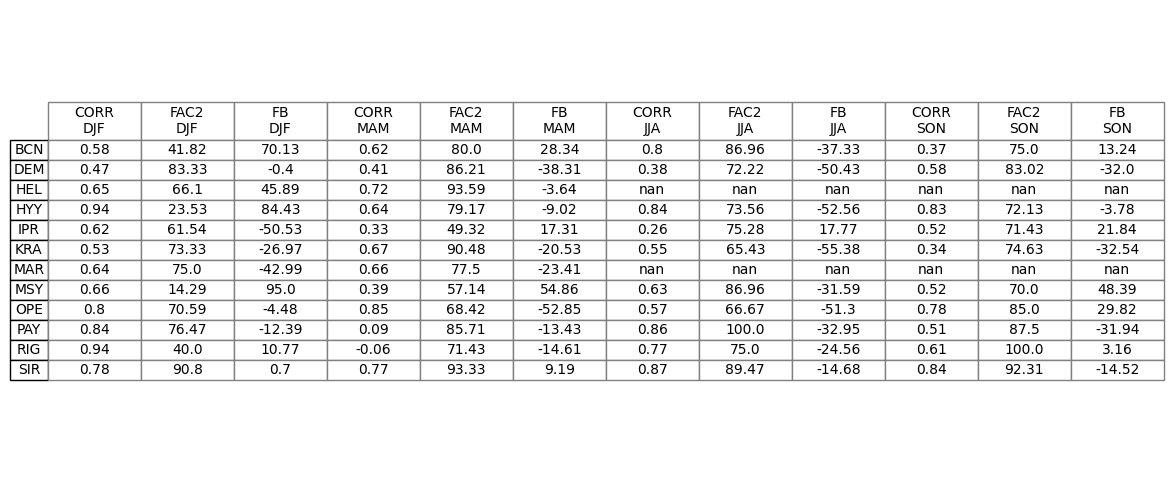

In [63]:
nombres_columnas = ['\n'.join(col).strip() for col in df_resultados_temporadas.columns.values]

# Crea una figura y un eje con matplotlib
fig, ax = plt.subplots(figsize=(12, 6))  # Ajusta el tamaño según sea necesario

# Oculta los ejes
ax.axis('off')

# Crea una tabla en el eje
tabla = ax.table(cellText=df_resultados_temporadas.values, 
                 colLabels=nombres_columnas, 
                 rowLabels=df_resultados_temporadas.index, 
                 cellLoc = 'center', rowLoc = 'center',
                 loc='center')

# Estilo al estilo LaTeX
# Desactivar todas las líneas de la cuadrícula excepto las del encabezado y la del final
for key, cell in tabla.get_celld().items():
    if key[1] == -1:  # Encabezado
        cell.set_linewidth(1)
        cell.set_edgecolor('black')
    else:
        cell.set_linewidth(1)
        cell.set_edgecolor('gray')  # Poner el mismo color que el fondo

# Ajusta la altura del encabezado de la tabla
# Itera solo sobre las celdas del encabezado
for col in range(len(nombres_columnas)):
    tabla[(0, col)].set_height(0.07)  # Ajusta este valor según sea necesario

# Ajusta la escala de la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)  # Ajusta el tamaño de la fuente según sea necesario
tabla.scale(1.2, 1.2)  # Ajusta el tamaño de la celda según sea necesario


#crear una carpeta para guardar los resultados
if not os.path.exists('results_mass_stats'):
    os.makedirs('results_mass_stats')
# Guarda la figura
plt.savefig('results_mass_stats/tabla_resultados_by_season.png', bbox_inches='tight', dpi=300)